In [3]:
import pandas as pd

In [5]:
# Load and preprocess the data
data = pd.read_csv('Dataset_wine.csv')

In [6]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [8]:
# Check for missing values
print(data.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
wine_type               0
dtype: int64


In [9]:
# Display summary statistics
print(data.describe())

       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

In [7]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


**Check Data Distribution**

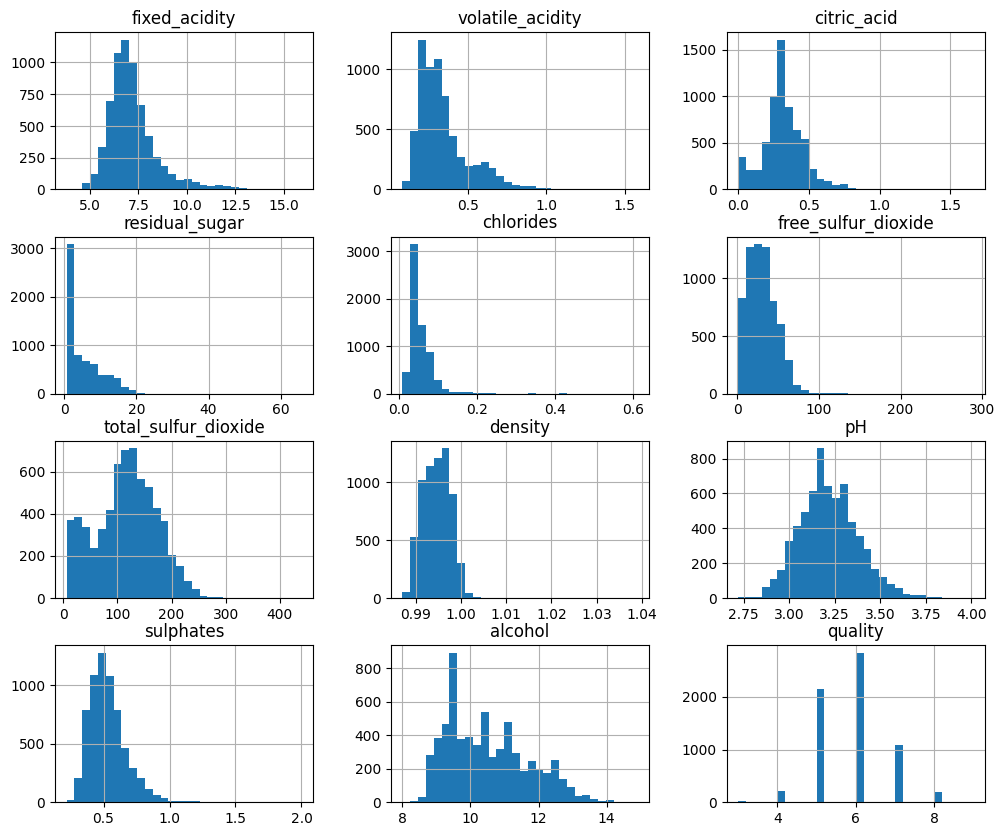

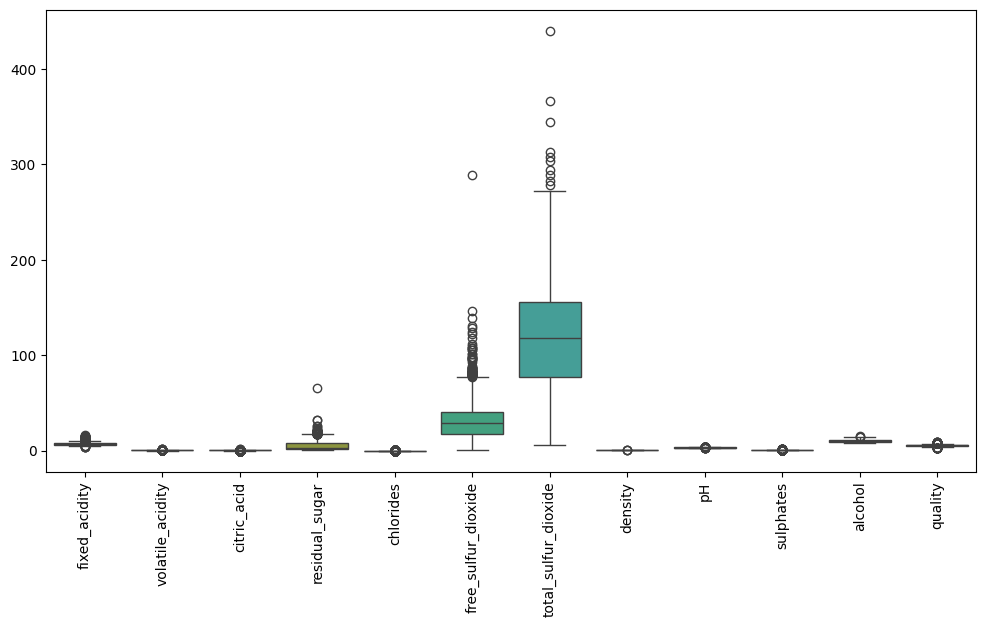

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of numerical features
data.hist(figsize=(12,10), bins=30)
plt.show()

# Boxplot to identify outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=data.drop(columns=['wine_type']))
plt.xticks(rotation=90)
plt.show()


Correlation AnalysisHow would you describe the "state" of this dataset?
The dataset consists of numerical and categorical attributes related to the chemical composition of red and white wines. The dataset appears relatively well-structured but contains some challenges:

Missing Values: The presence of missing values can distort the analysis. Identifying whether these values are missing at random or due to systematic issues is critical.

Outliers: Some variables (e.g., sulphates, residual_sugar, alcohol) may contain extreme values that could bias the analysis. Determining whether these are legitimate data points or errors is important.

Duplicate Rows: If duplicates exist, they might artificially inflate the significance of certain data points.

Feature Correlation: The correlation analysis helps in identifying collinear features. If some variables are highly correlated (e.g., free_sulfur_dioxide and total_sulfur_dioxide), they may not contribute much additional information.

Categorical Data: The "wine_type" column is categorical, but it is currently stored as a string. It may need to be encoded for machine learning applications.

The Plan
To clean this dataset while minimizing bias:

Handle Missing Values

If missing values are minimal, consider dropping them.
If they are frequent, use imputation techniques such as the mean, median, or mode depending on the distribution of the data.
Remove Duplicates

If duplicate rows exist, they should be dropped to prevent redundancy.
Address Outliers

Use boxplots to detect outliers.
If outliers are genuine, keep them; if they result from data entry errors, remove them.
Normalize or Scale Data

Some features (e.g., alcohol, density) may need normalization or standardization for better model performance.
Convert Categorical Data

Convert the wine_type column into numerical format (0 for red, 1 for white) to facilitate analysis.
Assess Skewness

If numerical features are highly skewed, transformations (such as log or square root transformations) may be required.


Implementation: Data Cleaning
1. Handling Missing Values

In [12]:
# Checking percentage of missing values
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
print(missing_percentage)

# Impute missing values (using median as it is robust to outliers)
for column in data.columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].median(), inplace=True)


fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
wine_type               0.0
dtype: float64


2. Removing Duplicates

In [13]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

3. Handling Outliers

In [14]:
from scipy import stats

# Remove extreme outliers (beyond 3 standard deviations)
z_scores = np.abs(stats.zscore(data.select_dtypes(include=['float64', 'int64'])))
data_cleaned = data[(z_scores < 3).all(axis=1)]


4. Encoding Categorical Data

In [15]:
# Convert wine_type to numerical values
data_cleaned['wine_type'] = data_cleaned['wine_type'].map({'red': 0, 'white': 1})


<ipython-input-15-8cce49d81777>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['wine_type'] = data_cleaned['wine_type'].map({'red': 0, 'white': 1})


Reflection
After performing the data cleaning, several key observations emerged:

Biggest Issues in the Dataset

The presence of missing values was a challenge, requiring careful consideration for imputation.
Some features exhibited extreme outliers that, if not addressed, could have skewed the results.
Duplicate rows were found, and removing them helped improve the dataset’s quality.
Feature correlations indicated that some variables were highly interdependent.
Impact of Data Cleaning on Usability for Machine Learning

Cleaning the dataset improved its consistency and reliability.
By handling missing values appropriately, we ensured that our model wouldn't be biased by the presence of NaNs.
Removing outliers helped prevent extreme values from unduly influencing the model.
Encoding categorical data allowed for seamless integration into machine learning models.
Effect of Training a Model on Messy vs. Cleaned Data

A model trained on the raw dataset would likely suffer from poor generalization due to the presence of noise (outliers, missing values, and inconsistencies).
A cleaned dataset ensures that the patterns learned by the model reflect genuine relationships in the data rather than errors or inconsistencies.
Potential Skew or Bias Introduced During Cleaning

Data cleaning, if done improperly, can introduce bias. For example, imputing missing values using the median assumes that missing values follow the same distribution as existing ones, which might not always be true.
Removing outliers could remove important rare cases that contribute to meaningful variation in the dataset.
Encoding categorical variables, if done incorrectly, could distort relationships.
Overall, while efforts were made to minimize bias, every decision (e.g., imputation strategy, outlier removal) potentially altered the dataset's structure. The key takeaway is that data cleaning should be done cautiously, ensuring that the original data distribution and trends are preserved as much as possible.

